# Neuron networks from scratch in Python
References: http://103.203.175.90:81/fdScript/RootOfEBooks/E%20Book%20collection%20-%202024%20-%20G/CSE%20%20IT%20AIDS%20ML/Neural%20Network.pdf

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
nnfs.init()

## Chapter 19: A real dataset

### 19.1 Data preparation

In [145]:
import os
import urllib
import urllib.request
from zipfile import ZipFile

In [146]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

In [147]:
if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}')
    urllib.request.urlretrieve(URL, FILE)

print('Unzipping images')
with ZipFile(FILE) as zip_images:
    zip_images.extractall(FOLDER)

print('Done!')

Unzipping images
Done!


### 19.2 Data loading

In [148]:
import cv2

image_data = cv2.imread('fashion_mnist_images/train/1/0001.png', cv2.IMREAD_UNCHANGED)
np.set_printoptions(linewidth=200)
print(image_data)

[[  0   0   0   0   0   0   0   0   9   0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6  30   3   4   4  13  21  30  49  31   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 158 229 214 215 208 212 215 214 227 228   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 202 206 205 212 233 244 214 200 205 196   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 226 208 196 182 240 211 202 194 194 252   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 232 204 203 176 217 208 205 192 184 251  31   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   8 253 202 199 180 205 196 190 202 192 233  57   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  26 250 185 197 180 199 196 182 203 187 209  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  43 241 190 197 184 199 198 181 204 179 198  9

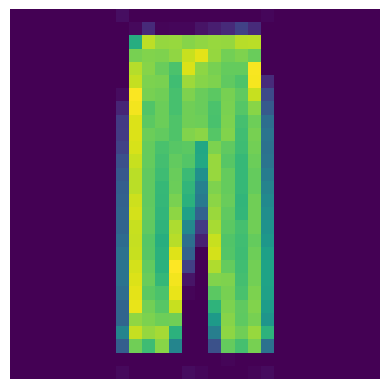

In [149]:
plt.imshow(image_data)
plt.axis('off')
plt.show()

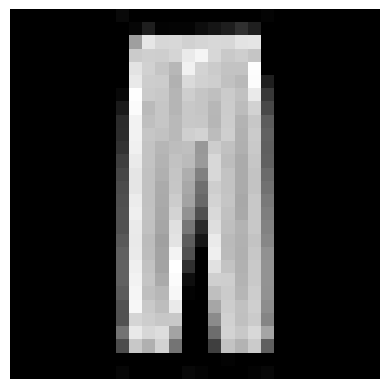

In [150]:
plt.imshow(image_data, cmap='gray')
plt.axis('off')
plt.show()

In [151]:
def load_mnist_dataset(dataset, path):
    labels = sorted(os.listdir('fashion_mnist_images/train'))

    X = []
    y = []

    for label in labels:
        for file in os.listdir(os.path.join(path, dataset, label)):
            image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)

            X.append(image)
            y.append(label)

    return np.array(X), np.array(y).astype('uint8')

def create_data_mnist(path):
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)

    return X, y, X_test, y_test

In [152]:
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

### 19.3 Data preprocessing

In [153]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(60000, 28, 28)


In [154]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

### 19.4 Data shuffling

In [155]:
print(y[0:6000])
print(y[6000:12000])
print(y[12001:18000])

[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[2 2 2 ... 2 2 2]


[    0     1     2 ... 59997 59998 59999]


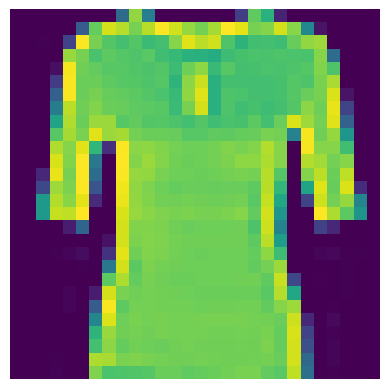

In [156]:
keys = np.array(range(X.shape[0]))
print(keys)
plt.axis('off')
plt.imshow(X[3].reshape((28, 28)))

np.random.shuffle(keys)
X = X[keys]
y = y[keys]

[ 3048 19563 58303 ... 42613 43567  2732]


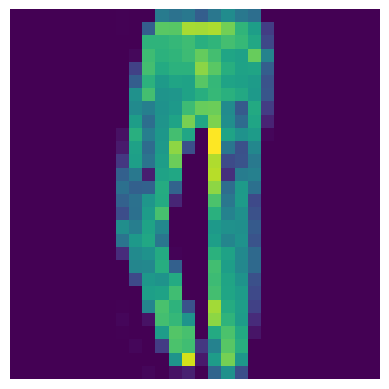

In [157]:
print(keys)
plt.axis('off')
plt.imshow(X[3].reshape((28, 28)))

### 19.5 Batches

In [158]:
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

EPOCHS = 10
BATCH_SIZE = 128

steps = X.shape[0] // BATCH_SIZE

if steps * BATCH_SIZE < X.shape[0]:
    steps += 1

for epoch in range(EPOCHS):
    for step in range(steps):
        batch_X = X[step*BATCH_SIZE:(step+1)*BATCH_SIZE]
        batch_y = y[step*BATCH_SIZE:(step+1)*BATCH_SIZE]


### Implement

In [159]:
# LAYER

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, l1_weight_regularizer=0., l1_bias_regularizer=0.,
                 l2_weight_regularizer=0., l2_bias_regularizer=0.):
        
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

        self.l1_weight_regularizer = l1_weight_regularizer
        self.l1_bias_regularizer = l1_bias_regularizer
        self.l2_weight_regularizer = l2_weight_regularizer
        self.l2_bias_regularizer = l2_bias_regularizer
    
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

        if self.l1_weight_regularizer > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.l1_weight_regularizer * dL1

        if self.l1_bias_regularizer > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.l1_bias_regularizer * dL1

        if self.l2_weight_regularizer > 0:
            self.dweights += 2 * self.l2_weight_regularizer * self.weights
        
        if self.l2_bias_regularizer > 0:
            self.dbiases += 2 * self.l2_bias_regularizer * self.biases

class Layer_Dropout:
    def __init__(self, dropout_rate):
        self.rate = 1 - dropout_rate
    
    def forward(self, inputs, training):
        self.inputs = inputs
        self.binary_mask = np.random.binomial(1, self.rate, inputs.shape) / self.rate
        
        self.output = self.binary_mask * inputs
    
    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask

class Layer_Input:
    def forward(self, inputs, training):
        self.output = inputs

# ACTIVATION

class Activation_ReLU:
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)
    
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0
    
    def predictions(self, outputs):
        return outputs

class Activation_Softmax:
    def forward(self, inputs, training):
        self.inputs = inputs
        exp_val = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_val / np.sum(exp_val, axis=1, keepdims=True)
    
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()

        for index, (single_output, single_dvalue) in enumerate(zip(self.output, dvalues)):
            single_output = np.reshape(single_output, (-1, 1))
            jacobian = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            self.dinputs[index] = np.dot(jacobian, single_dvalue)
    
    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)

class Activation_Sigmoid:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = 1. / 1. + np.exp(-inputs)
    
    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output
    
    def predictions(self, outputs):
        return (outputs > 0.5) * 1

class Activation_Linear:
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = inputs
    
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
    
    def predictions(self, outputs):
        return outputs

# LOSS

class Loss:
    def regularization_loss(self):
        reg_loss = 0

        for layer in self.trainable_layers:
            if layer.l1_weight_regularizer > 0:
                reg_loss += layer.l1_weight_regularizer * np.sum(np.abs(layer.weights))
            if layer.l1_bias_regularizer > 0:
                reg_loss += layer.l1_bias_regularizer * np.sum(np.abs(layer.biases))
            if layer.l2_weight_regularizer > 0:
                reg_loss += layer.l2_weight_regularizer * np.sum(layer.weights ** 2)
            if layer.l2_bias_regularizer > 0:
                reg_loss += layer.l2_bias_regularizer * np.sum(layer.biases ** 2)
        
        return reg_loss

    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers
    
    def calculate(self, output, y, *, include_regularization=False):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)

        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)

        if not include_regularization:
            return data_loss

        return data_loss, self.regularization_loss()

    def calculate_accumulated(self, *, include_regularization=False):
        data_loss = self.accumulated_sum / self.accumulated_count

        if not include_regularization:
            return data_loss

        return data_loss, self.regularization_loss()

    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)

        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred[range(samples), y_true] 
        
        if len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred * y_true, axis=1)
        
        return - np.log(correct_confidences)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        
        self.dinputs = - y_true / dvalues / samples

class Activation_Softmax_Loss_CategoricalCrossentropy():
    def backward(self, dvalues, y_true):
        samples = len(dvalues)

        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs /= samples

class Loss_BinaryCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)

        sample_losses = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        return np.mean(sample_losses, axis=-1)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        outputs = len(dvalues[0])

        dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)

        self.dinputs = - (y_true / dvalues - (1 - y_true) / (1 - dvalues)) / outputs / samples

class Loss_MeanSquaredError(Loss):
    def forward(self, y_pred, y_true):
        return np.mean((y_true - y_pred)**2, axis=-1)
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        outputs = len(dvalues[0])

        self.dinputs = -2 * (y_true - dvalues) / outputs / samples

class Loss_MeanAbsoluteError(Loss):
    def forward(self, y_pred, y_true):
        return np.mean(np.abs(y_true - y_pred), axis=-1)
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        outputs = len(dvalues[0])

        self.dinputs = np.sign(y_true - dvalues) / outputs / samples

# ACCURACY

class Accuracy:
    def calculate(self, predictions, y):
        comparisions = self.compare(predictions, y)
        accuracy = np.mean(comparisions)

        self.accumulated_sum += np.sum(comparisions)
        self.accumulated_count += len(comparisions)

        return accuracy
    
    def calculate_accumulated(self):
        accuracy = self.accumulated_sum / self.accumulated_count
        return accuracy

    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0

class Accuracy_Categorical(Accuracy):
    def __init__(self, *, binary=False):
        self.binary = binary
    
    def init(self, y):
        pass
    
    def compare(self, predictions, y):
        if not self.binary and len(y.shape) == 2:
            y = np.argmax(y, axis=1)
        return predictions == y

class Accuracy_Regression(Accuracy):
    def __init__(self):
        self.precision = None

    def init(self, y, reinit=False):
        if self.precision is None or reinit:
            self.precision = np.std(y) / 250

    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision
    
# OPTIMIZER

class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, decay=0., eps=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.eps = eps
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.iterations = 0

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1. + self.decay * self.iterations)

    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights ** 2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases ** 2
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))
            
        layer.weights -= self.current_learning_rate * weight_momentums_corrected / \
        (np.sqrt(weight_cache_corrected) + self.eps)
        layer.biases -= self.current_learning_rate * bias_momentums_corrected / \
        (np.sqrt(bias_cache_corrected) + self.eps)

    def post_update_params(self):
        self.iterations += 1

In [160]:
class Model:
    def __init__(self):
        self.layers = []
        self.softmax_classifier_output = None
    
    def add(self, layer):
        self.layers.append(layer)
    
    def set(self, *, loss, optimizer, accuracy):
        self.loss = loss
        self.optimizer = optimizer
        self.accuracy = accuracy
    
    def finalize(self):
        self.input_layer = Layer_Input()

        layer_count = len(self.layers)
        self.trainable_layers = []

        for i in range(layer_count):
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i + 1]
            elif i < layer_count - 1:
                self.layers[i].prev = self.layers[i - 1]
                self.layers[i].next = self.layers[i + 1]
            else:
                self.layers[i].prev = self.layers[i - 1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]
            
            if hasattr(self.layers[i], 'weights'):
                self.trainable_layers.append(self.layers[i])
        
        self.loss.remember_trainable_layers(self.trainable_layers)

        if isinstance(self.layers[-1], Activation_Softmax) and \
            isinstance(self.loss, Loss_CategoricalCrossentropy):
            self.softmax_classifier_output = Activation_Softmax_Loss_CategoricalCrossentropy()

    def train(self, X, y, *, epochs=1, batch_size=None, print_every=1, validation_data=None):
        self.accuracy.init(y)

        train_steps = 1

        if validation_data is not None:
            validation_steps = 1
            X_val, y_val = validation_data
        
        if batch_size is not None:
            train_steps = len(X) // batch_size
            if validation_steps * batch_size < len(X):
                train_steps += 1
            
            if validation_data is not None:
                validation_steps = len(X_val) // batch_size
                if validation_steps * batch_size < len(X_val):
                    validation_steps += 1
        
        for epoch in range(1, epochs+1):
            print(f'epoch: {epoch}')

            self.loss.new_pass()
            self.accuracy.new_pass()

            for step in range(train_steps):

                if batch_size is None:
                    batch_X = X
                    batch_y = y
                
                else:
                    batch_X = X[step*batch_size:(step+1)*batch_size]
                    batch_y = y[step*batch_size:(step+1)*batch_size]
                
                output = self.forward(batch_X, training=True)

                data_loss, regularization_loss = \
                self.loss.calculate(output, batch_y, include_regularization=True)
                loss = data_loss + regularization_loss

                predictions = self.output_layer_activation.predictions(output)
                accuracy = self.accuracy.calculate(predictions, batch_y)

                self.backward(output, batch_y)

                self.optimizer.pre_update_params()
                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)
                self.optimizer.post_update_params()

                if not step % print_every or step == train_steps - 1:
                    print(f'step: {step}, ' +
                          f'acc: {accuracy:.3f}, ' +
                          f'loss: {loss:.3f} (' +
                          f'data_loss: {data_loss:.3f}, ' +
                          f'reg_loss: {regularization_loss:.3f}), ' +
                          f'lr: {self.optimizer.current_learning_rate}')

            epoch_data_loss, epoch_regularization_loss = \
                self.loss.calculate_accumulated(include_regularization=True)
            epoch_loss = epoch_data_loss + epoch_regularization_loss
            epoch_accuracy = self.accuracy.calculate_accumulated()

            print(f'training, ' +
                  f'acc: {epoch_accuracy:.3f}, ' +
                  f'loss: {epoch_loss:.3f} (' +
                  f'data_loss: {epoch_data_loss:.3f}, ' +
                  f'reg_loss: {epoch_regularization_loss:.3f}), ' +
                  f'lr: {self.optimizer.current_learning_rate}')
            
            if validation_data is not None:
                self.loss.new_pass()
                self.accuracy.new_pass()

                for step in range(validation_steps):
                    if batch_size is None:
                        batch_X = X_val
                        batch_y = y_val
                    
                    else:
                        batch_X = X_val[step*batch_size:(step+1)*batch_size]
                        batch_y = y_val[step*batch_size:(step+1)*batch_size]    

                    output = self.forward(batch_X, training=False)
                    self.loss.calculate(output, batch_y)
                    predictions = self.output_layer_activation.predictions(output)
                    self.accuracy.calculate(predictions, batch_y)

                validation_loss = self.loss.calculate_accumulated()
                validation_accuracy = self.accuracy.calculate_accumulated()

                print(f'validation, acc: {validation_accuracy:.3f}, loss: {validation_loss:.3f}')

    def forward(self, X, training):
        self.input_layer.forward(X, training)

        for layer in self.layers:
            layer.forward(layer.prev.output, training)

        return layer.output
    
    def backward(self, output, y):
        if self.softmax_classifier_output is not None:
            self.softmax_classifier_output.backward(output, y)
            self.layers[-1].dinputs = self.softmax_classifier_output.dinputs

            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)
            
            return
        
        self.loss.backward(output, y)

        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)

In [162]:
def load_mnist_dataset(dataset, path):
    labels = sorted(os.listdir(os.path.join(path, dataset)))

    X = []
    y = []

    for label in labels:
        for file in os.listdir(os.path.join(path, dataset, label)):
            image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)
            X.append(image)
            y.append(label)

    return np.array(X), np.array(y).astype('uint8')

def create_mnist_dataset(path):
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)

    return X, y, X_test, y_test

X, y, X_test, y_test = create_mnist_dataset('fashion_mnist_images')

keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) - 127.5) / 127.5

model = Model()

model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.1))
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.1))
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

model.set(loss=Loss_CategoricalCrossentropy(), optimizer=Optimizer_Adam(decay=1e-3), accuracy=Accuracy_Categorical())
model.finalize()

model.train(X, y, validation_data=(X_test, y_test), epochs=10, batch_size=128, print_every=100)


epoch: 1
step: 0, acc: 0.062, loss: 2.303 (data_loss: 2.303, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.773, loss: 0.722 (data_loss: 0.722, reg_loss: 0.000), lr: 0.0009090909090909091
step: 200, acc: 0.766, loss: 0.672 (data_loss: 0.672, reg_loss: 0.000), lr: 0.0008333333333333334
step: 300, acc: 0.820, loss: 0.508 (data_loss: 0.508, reg_loss: 0.000), lr: 0.0007692307692307692
step: 400, acc: 0.844, loss: 0.452 (data_loss: 0.452, reg_loss: 0.000), lr: 0.0007142857142857144
step: 468, acc: 0.823, loss: 0.581 (data_loss: 0.581, reg_loss: 0.000), lr: 0.0006811989100817438
training, acc: 0.747, loss: 0.677 (data_loss: 0.677, reg_loss: 0.000), lr: 0.0006811989100817438
validation, acc: 0.818, loss: 0.494
epoch: 2
step: 0, acc: 0.836, loss: 0.484 (data_loss: 0.484, reg_loss: 0.000), lr: 0.0006807351940095302
step: 100, acc: 0.852, loss: 0.372 (data_loss: 0.372, reg_loss: 0.000), lr: 0.0006373486297004462
step: 200, acc: 0.820, loss: 0.498 (data_loss: 0.498, reg_loss: 0.000), lr: 0.0005991